In [1]:
# Data Source: https://firemap.sdsc.edu:8443/geoserver/web/

In [167]:
%matplotlib inline
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt

In [168]:
# Creating a numpy array from an image file:

In [200]:
from skimage import data

photo_data = data.rocket()
photo_data = misc.imread('./wifire/sd-3layers.jpg')
type(photo_data)

numpy.ndarray

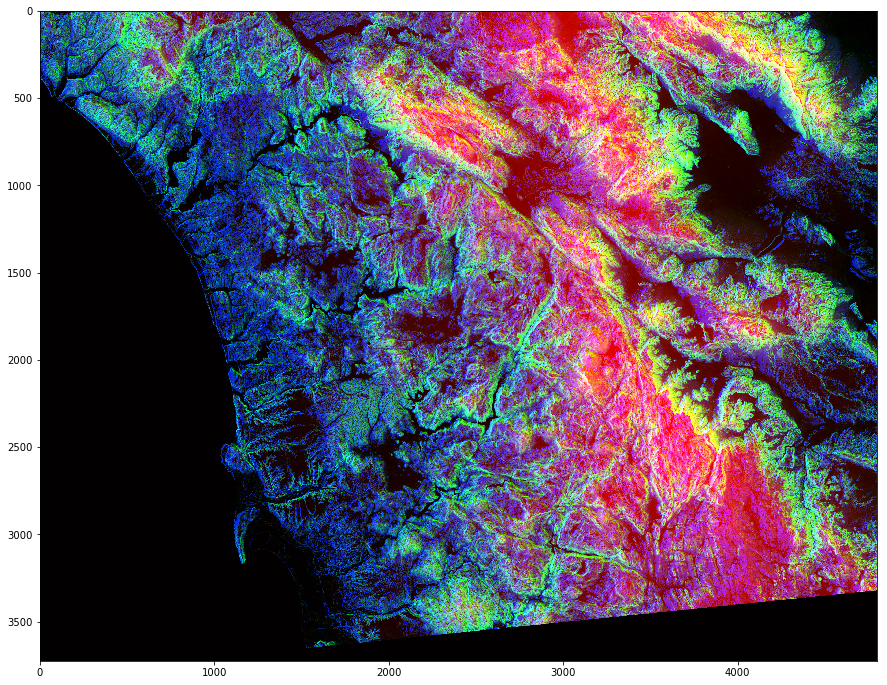

In [201]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [202]:
photo_data.shape

(3725, 4797, 3)

In [203]:
photo_data.size

53606475

In [204]:
photo_data.min(), photo_data.max()

(0, 255)

In [205]:
photo_data.mean()

75.829935450894695

In [206]:
# Pixel on the 150th row and 250th column
photo_data[150, 250]

array([ 17,  35, 255], dtype=uint8)

In [219]:
# Set to zero
photo_data[150, 250] = 0

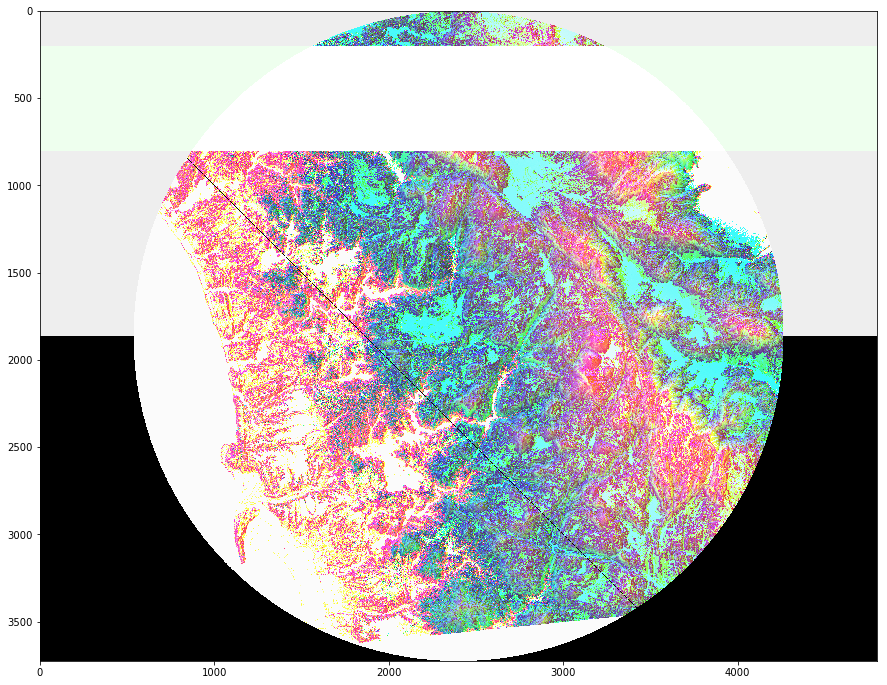

In [221]:
# Set to 255 : all pixels in a range
photo_data[200:800,:,1] = 255
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [222]:
filter = photo_data < 50

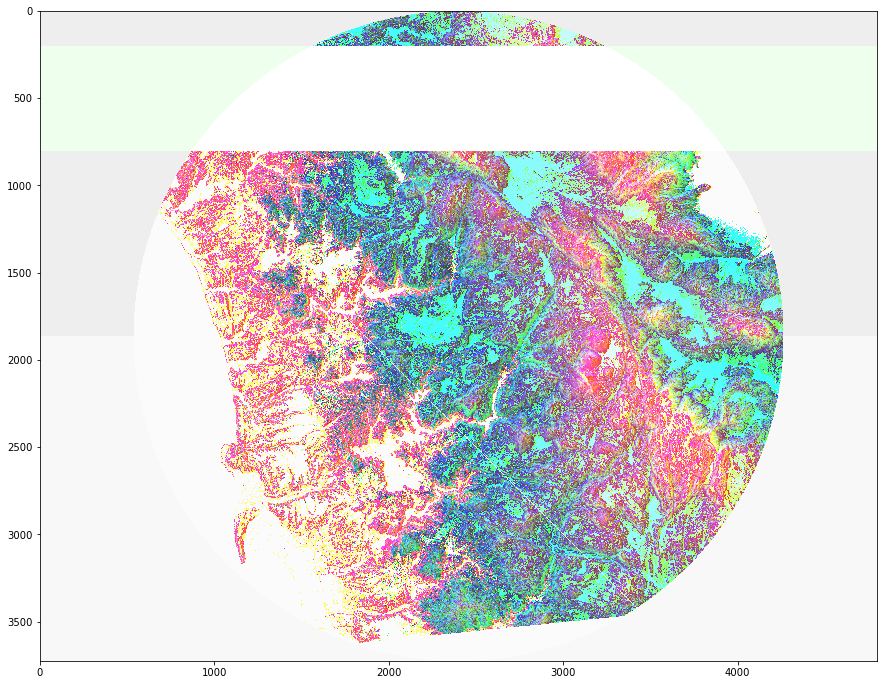

In [223]:
# Whenever the filter is True: set value to a random integer

import random
photo_data[filter] = random.randint(200,255)
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [224]:
rows = np.arange(len(photo_data))
cols = rows % len(photo_data)

In [225]:
photo_data[rows, cols] = 0

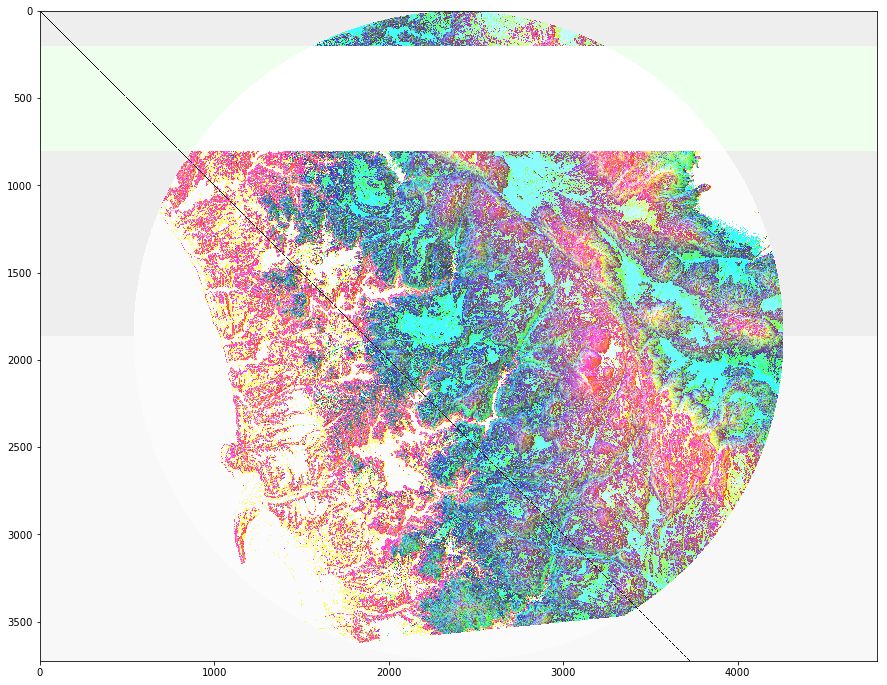

In [226]:
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [227]:
totalRows, totalCols, totalLayers = photo_data.shape

X, Y = np.ogrid[:totalRows, :totalCols]

In [228]:
center_row, center_col = totalRows / 2, totalCols / 2

distFromCenter = (X - center_row)**2 + (Y - center_col)**2
radius = (totalRows / 2)**2
circular_filter = (distFromCenter > radius)

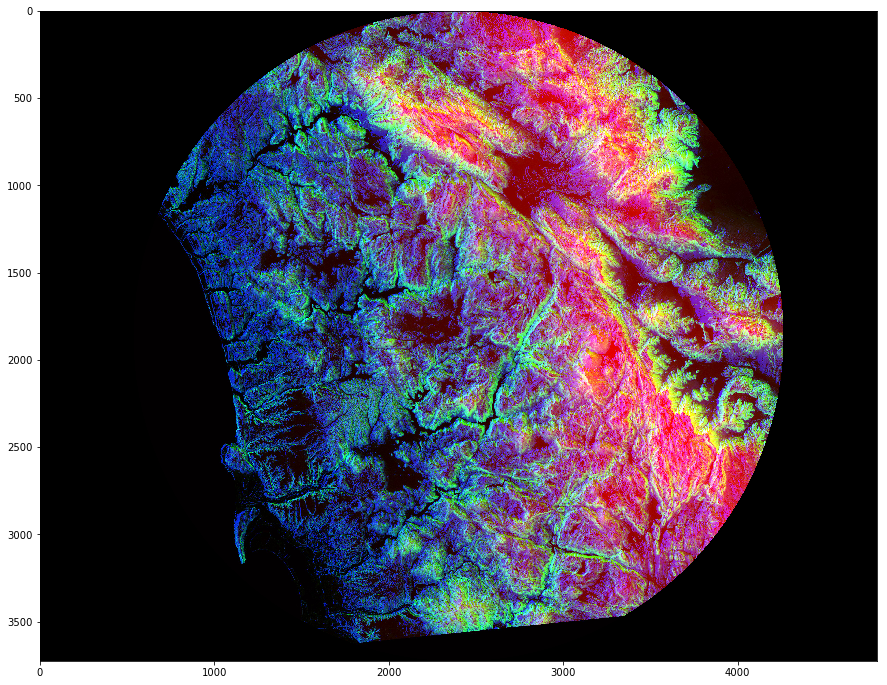

In [230]:
photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data[circular_filter] = 0
plt.figure(figsize=(15,15))
plt.imshow(photo_data)

In [231]:
X, Y = np.ogrid[:totalRows, :totalCols]
half_upper = X < center_row
half_upper_filter = np.logical_and(half_upper, circular_filter)

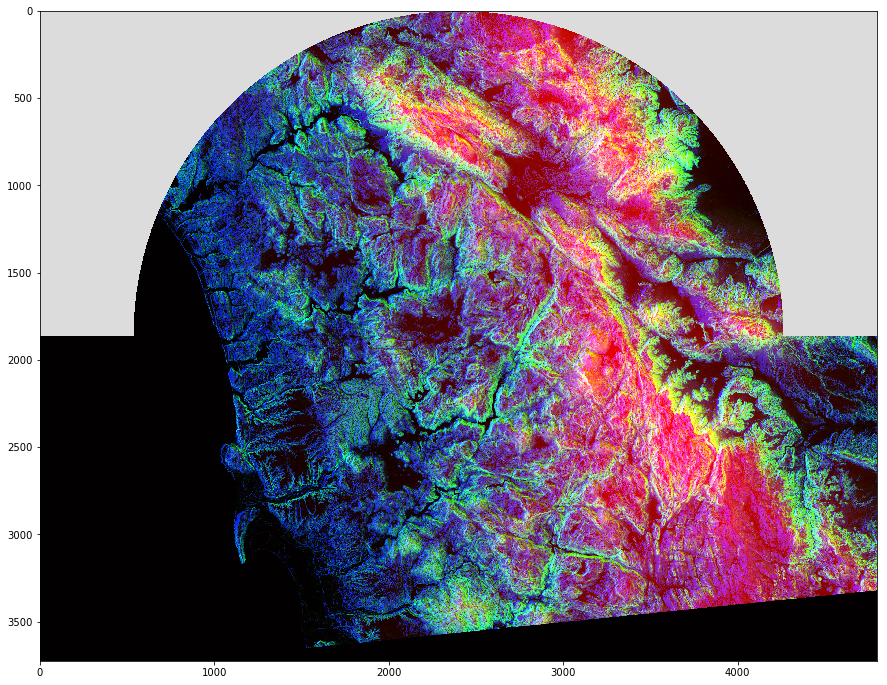

In [232]:
plt.figure(figsize=(15,15))
photo_data = misc.imread('./wifire/sd-3layers.jpg')
photo_data[half_upper_filter] = random.randint(200,255)
plt.imshow(photo_data)